In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# lets create dummy data for classification with some null value for retail domain
data = {
    'age': [25, 45, 35, np.nan, 23, 40, 60, 50, np.nan, 30],
    'income': [50000, 80000, 60000, 70000, np.nan, 90000, 120000, 110000, 95000, np.nan],
    'purchase': [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
}
df = pd.DataFrame(data)
df

,age,income,purchase
0,25.0,50000.0,0
1,45.0,80000.0,1
2,35.0,60000.0,0
3,NaN,70000.0,1
4,23.0,NaN,0
5,40.0,90000.0,1
6,60.0,120000.0,1
7,50.0,110000.0,0
8,NaN,95000.0,1
9,30.0,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       8 non-null      float64
 1   income    8 non-null      float64
 2   purchase  10 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 372.0 bytes


In [4]:
# lets use mean imputation for null values
df['age'].fillna(df['age'].mean(), inplace=True)
df['income'].fillna(df['income'].mean(), inplace=True)

/var/folders/fq/kr6gv5l17pd4j572n0_n3f2c0000gn/T/ipykernel_1755/4050319668.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
/var/folders/fq/kr6gv5l17pd4j572n0_n3f2c0000gn/T/ipykernel_1755/4050319668.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'income']], df['purchase'], test_size=0.2, random_state=42)

print("Training set size:")
print(X_train.shape)
print("Testing set size:")
print(X_test.shape)


Training set size:
(8, 2)
Testing set size:
(2, 2)


In [6]:
# lets use standard scaler for scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 0.19734807,  0.28885418],
       [-1.08274751, -1.51472316],
       [ 1.05074513,  1.19064286],
       [-0.22935046, -1.06382883],
       [-0.65604899,  0.03522612],
       [-1.25342693,  0.03522612],
       [ 0.06933851, -0.61293449],
       [ 1.90414218,  1.6415372 ]])

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 100.00%
Confusion Matrix:
[[2]]
F1 Score: 1.00
Precision: 1.00


/Users/rahultiwari/Documents/02_Freelancing/as_ds_course/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


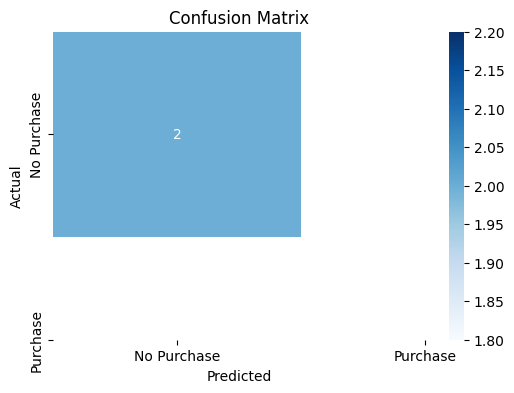

In [9]:
# lets intialize random seed
np.random.seed(42)
# model initialization
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
# making predictions
y_pred = model.predict(X_test)
# evaluating the model 
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")
# precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")    
# recall
recall = recall_score(y_test, y_pred, average='weighted')

# lets plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [24]:
y_test.reset_index(drop=True, inplace=True)

In [27]:
# lets copy test data but convert into dataframe
test_results = X_test.copy()
test_results = pd.DataFrame(test_results, columns=['age', 'income'])
test_results['actual'] = y_test
test_results['predicted'] = y_pred
test_results


,age,income,actual,predicted
0,0.069339,0.514301,1,1
1,0.624047,-0.162040,1,1


In [28]:
# lets create data from retail domain with some categorical and numerical data with null values
data = {
    'age': [25, 45, 35, np.nan, 23, 40, 60, 50, np.nan, 30],
    'income': [50000, 80000, 60000, 70000, np.nan, 90000, 120000, 110000, 95000, np.nan],
    'gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']
}

df = pd.DataFrame(data)
df

,age,income,gender
0,25.0,50000.0,M
1,45.0,80000.0,F
2,35.0,60000.0,M
3,NaN,70000.0,F
4,23.0,NaN,M
5,40.0,90000.0,F
6,60.0,120000.0,M
7,50.0,110000.0,F
8,NaN,95000.0,M
9,30.0,NaN,F


In [29]:
# lets do one hot encoding
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
df

,age,income,gender_M
0,25.0,50000.0,True
1,45.0,80000.0,False
2,35.0,60000.0,True
3,NaN,70000.0,False
4,23.0,NaN,True
5,40.0,90000.0,False
6,60.0,120000.0,True
7,50.0,110000.0,False
8,NaN,95000.0,True
9,30.0,NaN,False
